## ライブラリインポート

In [1]:
!pip install arviz

In [4]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm
import arviz as az
az.style.use('arviz-darkgrid')

import warnings
warnings.simplefilter('ignore')

In [5]:
# 乱数のseed固定
random_state = 0

## パラメータ、データ作成

In [25]:
np.random.seed(random_state)
n_trials = 4
theta_real = 0.3
data = stats.bernoulli.rvs(p=theta_real, size=n_trials)
data

array([0, 1, 0, 0])

## モデリング、推論

In [29]:
# withブロックの内側すべてが一つのモデル
with pm.Model() as model:
    # モデリング
    theta = pm.Beta('θ', alpha=1., beta=1.) # 事前確率
    y = pm.Bernoulli('y', p=theta, observed=data) # 尤度
    
    # 推論
    trace = pm.sample(3000, random_seed=random_state)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [θ]
Sampling 2 chains: 100%|██████████| 7000/7000 [00:03<00:00, 1804.03draws/s]


## 結果の可視化

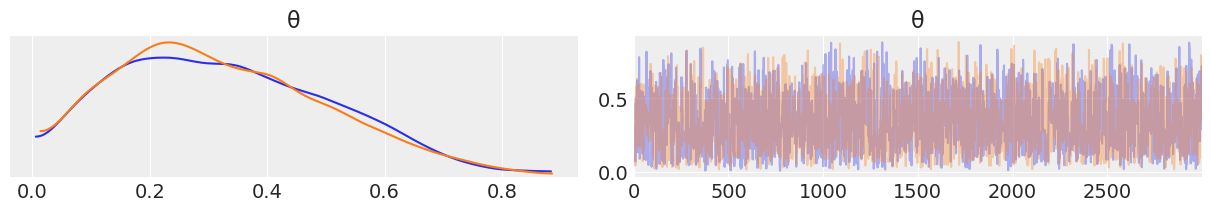

In [30]:
# トレースのプロット
az.plot_trace(trace)
plt.show()

In [31]:
# サマリー
az.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
θ,0.331,0.18,0.031,0.652,0.004,0.003,2502.0,2502.0,2466.0,3592.0,1.0


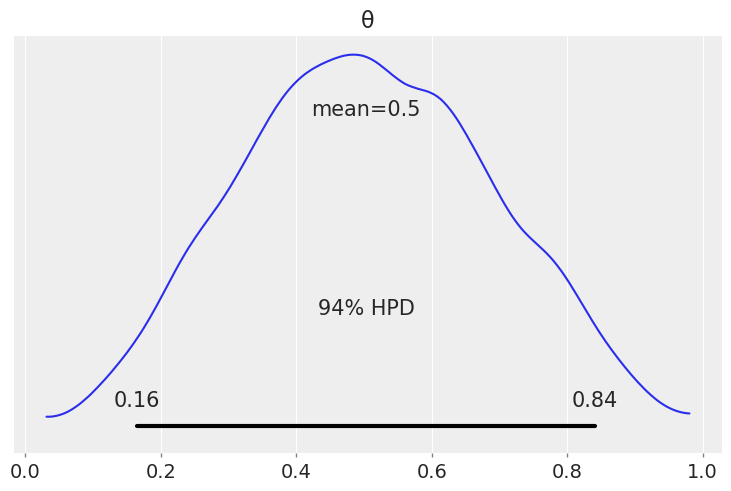

In [22]:
# 事後分布のプロット
az.plot_posterior(trace)
plt.show()

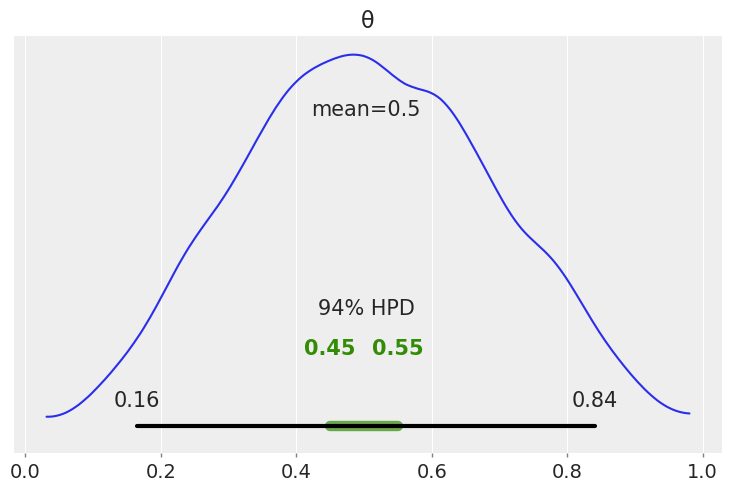

In [23]:
az.plot_posterior(trace, rope=[0.45, .55])
plt.show()

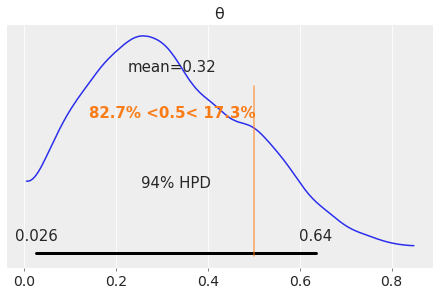

In [10]:
az.plot_posterior(trace, ref_val=0.5)
plt.show()

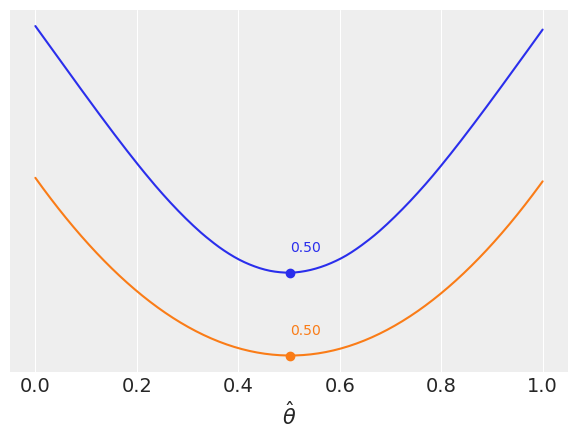

In [24]:
# 損失関数の比較
grid = np.linspace(0, 1, 200)
theta_pos = trace['θ']
lossf_a = [np.mean(abs(i - theta_pos)) for i in grid]
lossf_b = [np.mean((i - theta_pos)**2) for i in grid]

for lossf, c in zip([lossf_a, lossf_b], ['C0', 'C1']):
    mini = np.argmin(lossf)
    plt.plot(grid, lossf, c)
    plt.plot(grid[mini], lossf[mini], 'o', color=c)
    plt.annotate('{:.2f}'.format(grid[mini]),
                 (grid[mini], lossf[mini] + 0.03), color=c)
    plt.yticks([])
    plt.xlabel(r'$\hat \theta$')
plt.show()